# t-SNE:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing MNIST data set (digit recognisation)
data = pd.read_csv(r"D:\Applied AI\Data Sets\MNIST\train.csv")

In [3]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data #dataset

#seperating the labels from pixel values
label = data['label'] 
pixel_values = data.drop('label', axis = 1)

In [5]:
#shape of data-set
print(pixel_values.shape)
print(label.shape)

(42000, 784)
(42000,)


We have 42,000 observations.

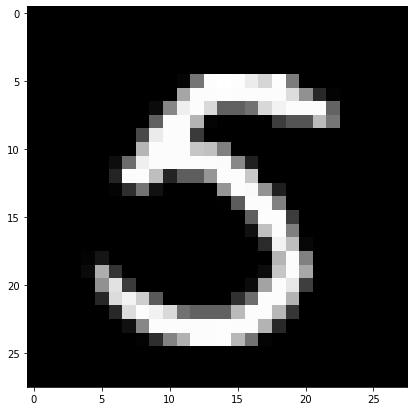

5


In [6]:
#display a number 
plt.figure(figsize = (7,7))
ind = 2568

grid_data = pixel_values.iloc[ind].to_numpy().reshape(28,28) # reshape from 1d -> 2d
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(label[ind])

In [8]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(pixel_values)

In [9]:
from sklearn.manifold import TSNE

# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
t_sne = TSNE(n_components = 2, random_state = 0)
t_sne_data = t_sne.fit_transform(std_data)

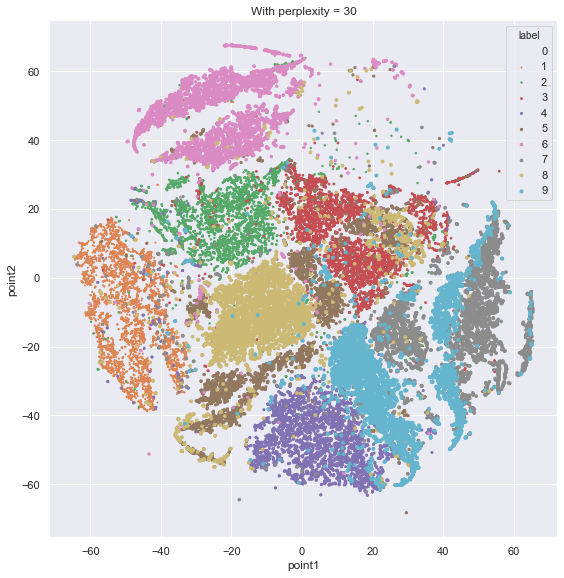

In [50]:
#let's add labels to the new_data_points
label = np.reshape(np.array(label), (42000, 1))
new_data_points = np.hstack((t_sne_data, label))
new_data_points

#creating a pandas dataframe
two_d_data = pd.DataFrame(data = new_data_points, columns = ("point1", "point2", "label"))

#changing the data type of label
two_d_data['label'] = two_d_data['label'].astype(int)

two_d_data

# #Let's plot the data points
sns.set()
sns.FacetGrid(two_d_data, hue = 'label', size = 8, palette = sns.color_palette(), legend_out = False).map(plt.scatter, 'point1', 'point2', 'label').add_legend()
plt.title("With perplexity = 30")
plt.show()

Let's observe any improvement by increasing and decreasing the perplexity value:

C:\Users\Swastik\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


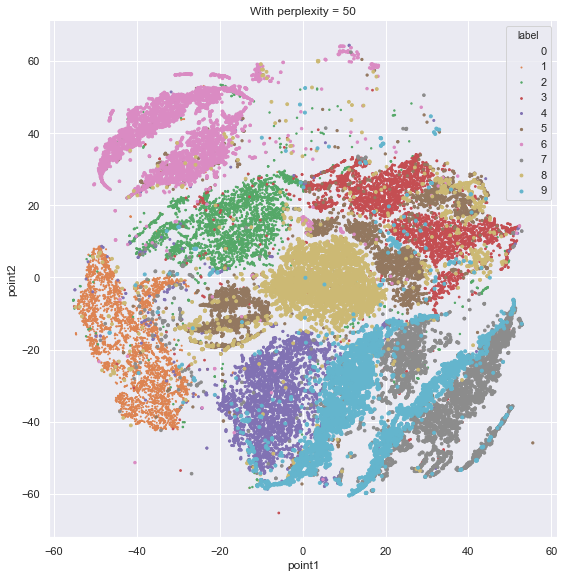

In [51]:
t_sne = TSNE(n_components = 2, random_state = 0, perplexity = 50)
t_sne_data = t_sne.fit_transform(std_data)

#let's add labels to the new_data_points
label = np.reshape(np.array(label), (42000, 1))
new_data_points = np.hstack((t_sne_data, label))
new_data_points

#creating a pandas dataframe
two_d_data = pd.DataFrame(data = new_data_points, columns = ("point1", "point2", "label"))

#changing the data type of label
two_d_data['label'] = two_d_data['label'].astype(int)

two_d_data

# #Let's plot the data points
sns.set()
sns.FacetGrid(two_d_data, hue = 'label', size = 8, palette = sns.color_palette(), legend_out = False).map(plt.scatter, 'point1', 'point2', 'label').add_legend()
plt.title("With perplexity = 50")
plt.show()

C:\Users\Swastik\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


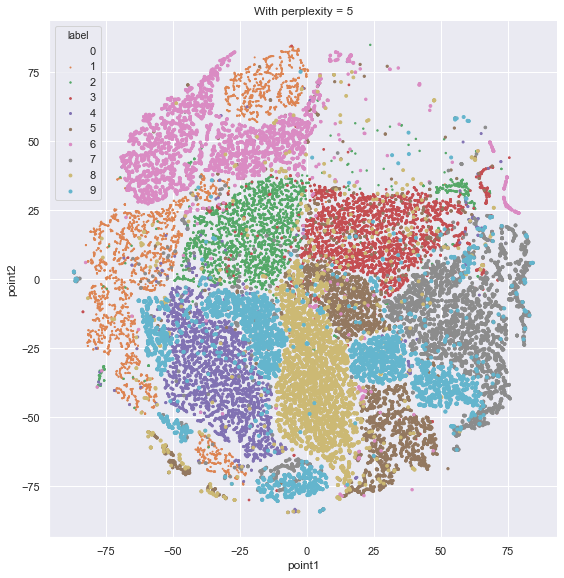

In [52]:
t_sne = TSNE(n_components = 2, random_state = 0, perplexity = 5)
t_sne_data = t_sne.fit_transform(std_data)

#let's add labels to the new_data_points
label = np.reshape(np.array(label), (42000, 1))
new_data_points = np.hstack((t_sne_data, label))
new_data_points

#creating a pandas dataframe
two_d_data = pd.DataFrame(data = new_data_points, columns = ("point1", "point2", "label"))

#changing the data type of label
two_d_data['label'] = two_d_data['label'].astype(int)

two_d_data

# #Let's plot the data points
sns.set()
sns.FacetGrid(two_d_data, hue = 'label', size = 8, palette = sns.color_palette(), legend_out = False).map(plt.scatter, 'point1', 'point2', 'label').add_legend()
plt.title("With perplexity = 5")
plt.show()

With decreasing perplexity value we are getting a more clearer visual. Now Let's fix the perplexity value to 5 and increse the iteration from 1000(default) to 5000:

C:\Users\Swastik\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


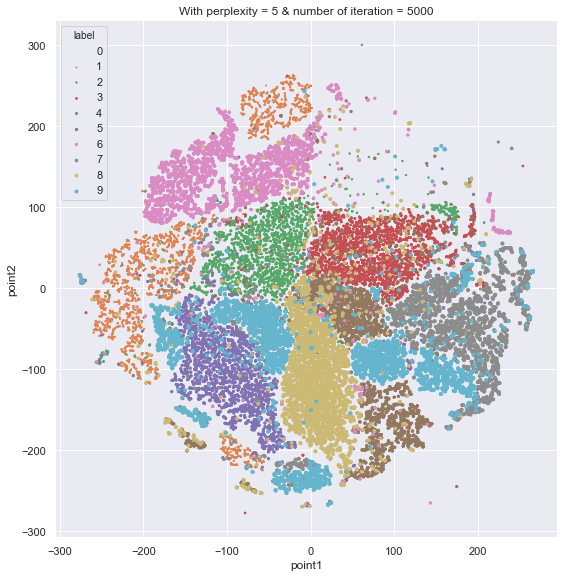

In [55]:
t_sne = TSNE(n_components = 2, random_state = 0, perplexity = 5, n_iter = 5000)
t_sne_data = t_sne.fit_transform(std_data)

#let's add labels to the new_data_points
label = np.reshape(np.array(label), (42000, 1))
new_data_points = np.hstack((t_sne_data, label))
new_data_points

#creating a pandas dataframe
two_d_data = pd.DataFrame(data = new_data_points, columns = ("point1", "point2", "label"))

#changing the data type of label
two_d_data['label'] = two_d_data['label'].astype(int)

two_d_data

# #Let's plot the data points
sns.set()
sns.FacetGrid(two_d_data, hue = 'label', size = 8, palette = sns.color_palette(), legend_out = False).map(plt.scatter, 'point1', 'point2', 'label').add_legend()
plt.title("With perplexity = 5 & number of iteration = 5000")
plt.show()

Let's visualize by keeping perplexity = 5, number of iteration = 5000 and decreasing the learning rate value from 200 to 100:

C:\Users\Swastik\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


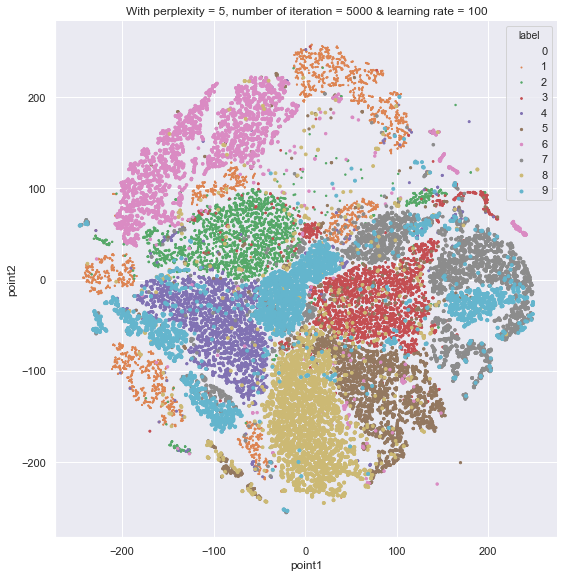

In [56]:
t_sne = TSNE(n_components = 2, random_state = 0, perplexity = 5, n_iter = 5000, learning_rate = 100)
t_sne_data = t_sne.fit_transform(std_data)

#let's add labels to the new_data_points
label = np.reshape(np.array(label), (42000, 1))
new_data_points = np.hstack((t_sne_data, label))
new_data_points

#creating a pandas dataframe
two_d_data = pd.DataFrame(data = new_data_points, columns = ("point1", "point2", "label"))

#changing the data type of label
two_d_data['label'] = two_d_data['label'].astype(int)

two_d_data

# #Let's plot the data points
sns.set()
sns.FacetGrid(two_d_data, hue = 'label', size = 8, palette = sns.color_palette(), legend_out = False).map(plt.scatter, 'point1', 'point2', 'label').add_legend()
plt.title("With perplexity = 5, number of iteration = 5000 & learning rate = 100")
plt.show()